<a href="https://colab.research.google.com/github/mochiiten9158/CS331-machine-problems/blob/main/Lab_04_Runtime_Complexities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Runtime Complexity

In [1]:
# remember to evaluate this cell first!
import matplotlib.pylab as plt
import numpy as np
import math
import statistics
import timeit
import random
%matplotlib inline

## Overview

In this lab you will be given a number of pre-written functions and, for each function $f$, will:

1. Determine its asymptotic runtime complexity; i.e., find $g$ where $f=O(g)$
2. Evaluate and collect runtimes of $f$ over different sizes of input
3. Plot collected runtimes along with appropriately parameterized graphs of $g$ to demonstrate tight asymptotic bounds

It is possible that in step 3 you will realize the bounding function $g$ you settled on in step 1 was incorrect, in which case you will need to make adjustments.

In class we covered how to use the `matplotlib` and `timeit` modules for drawing graphs and collecting timings --- be sure to revisit that material as needed!

## Example

Here's one of the functions we analyzed in class together:

In [2]:
def demo(n):
    accum = 0
    for i in range(n):
        accum += 1
    return accum

For our hypothesis, we might guess that $f = O(N)$, where $N$ is the magnitude of the integer argument.

To demonstrate this, we start by gathering timings for increasing values of $N$. For some of the exercises you may need to come up with other ways of calling the functions with increasing values, as not all the functions take integer arguments like this one.

In [3]:
ns = np.linspace(1, 10_000, 50, dtype=int)
ts = [timeit.timeit('demo({})'.format(n), 
                    number=100, 
                    globals=globals()) 
      for n in ns]

And now we can plot our gathered data along with some bounding functions to help demonstrate our hypothesis. Note that we use the `statistics` module to help compute the average slope, which is used as a constant in our plots. Our bounding functions are both clearly of form $c \cdot N$.

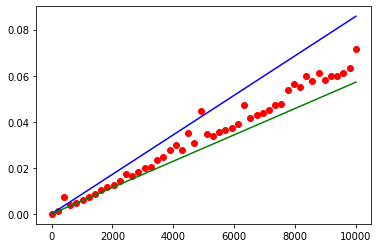

In [4]:
plt.plot(ns, ts, 'or')

avg_slope = statistics.mean((ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) for i in range(len(ns)-1))

plt.plot(ns, [1.2*avg_slope*n for n in ns], '-b')  # blue = upper bound
plt.plot(ns, [0.8*avg_slope*n for n in ns], '-g'); # green = lower bound

The bounding function plots help confirm (but not prove!) our hypothesis, as timings for increasing values of $N$ fall between the upper and lower bounds.

## Exercises

For the function provided in the first cell of each numbered exercise below, you will (1) state your hypothesized worst-case Big-O runtime complexity, (2) write code to collect timings for different sizes of input (it may take a bit of work to figure out how to come up with *worst-case* inputs!), and (3) plot the timings alongside bounding functions. As you work through an exercise, it's certainly possible that you may need to go back and revise your initial hypothesis. Note that the bounding functions must take the form $c \cdot g$, where $c$ is a constant multipler and $g$ is your stated runtime complexity. E.g., for a $O(N^2)$ function, your bounding functions will be of the form $c \cdot N^2$.

Each exercise already includes three cells beneath the provided function; simply fill them in with your own data. You are alotted a total of 30 seconds for all cells in the notebook to be evaluated, so you also need to be clever about collecting timings.

For each exercise, parts (1), (2), and (3) and worth 2 points each, giving a maximum score of 30 points for this lab.

---

## Exercise 1

In [5]:
def f1(lst):
    r = 0
    n = 100
    if len(lst) < n:
        n = len(lst)
    for x in range(n):
        r += x

### Part 1

Hypothesis: $f_1 = O(1)$ &larr; fill in your hypothesis here

### Part 2

In [6]:
# collect timing data into arrays/lists here
ns = np.linspace(1, 100_000, 50, dtype=int)
ts = [timeit.timeit('f1(lst)',
                    setup=f'lst=list(range({n}))',
                    number=100, 
                    globals=globals()) 
      for n in ns]

### Part 3

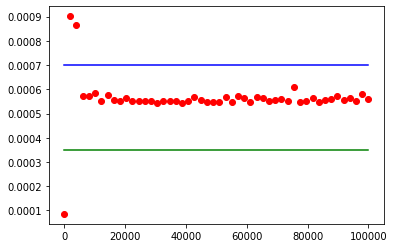

In [7]:
# plot your data and bounding functions here
plt.plot(ns, ts, 'or')
plt.plot(ns, [0.00035 for n in ns], '-g')
plt.plot(ns, [0.0007 for n in ns], '-b');

---

## Exercise 2

In [8]:
def f2(x):
    r = x / 2
    d = 1e-10
    while abs(x - r**2) > d:
        r = (r + x/r) / 2
    return r

### Part 1

Hypothesis: $f_2 = O(logN)$ &larr; fill in your hypothesis here

### Part 2

In [9]:
# collect timing data into arrays/lists here
ns = np.linspace(1, 100, 25, dtype=int)
ts = [timeit.timeit('f2({})'.format(x),
                    number=45,
                    globals=globals())
      for x in ns]

### Part 3

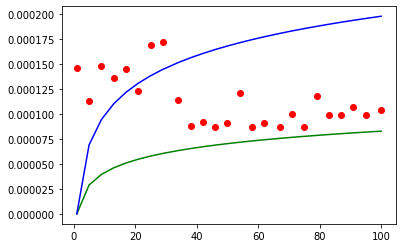

In [10]:
# plot your data and bounding functions here
plt.plot(ns, ts, 'or')
avg_slope = statistics.mean((ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) for i in range(len(ns)-1))
plt.plot(ns, [0.000018*math.log(x) for x in ns], '-g')
plt.plot(ns, [0.000043*math.log(x) for x in ns], '-b')

---

## Exercise 3

In [11]:
def f3(lst):
    while True:
        swapped = False
        for i in range(len(lst)-1):
            if lst[i] > lst[i+1]:
                lst[i], lst[i+1] = lst[i+1], lst[i]
                swapped = True
        if not swapped:
            break

### Part 1

Hypothesis: $f_3 = O(N^2)$ &larr; fill in your hypothesis here

### Part 2

In [12]:
# collect timing data into arrays/lists here
ns = np.linspace(1, 1000, 50, dtype=int)
ts = [timeit.timeit('f3(lst)',
                    setup=f'lst=list(reversed(range({n})))',
                    number=100, 
                    globals=globals()) 
      for n in ns]

### Part 3

[2.24445067e-07 4.14318894e-06 2.73922599e-04]


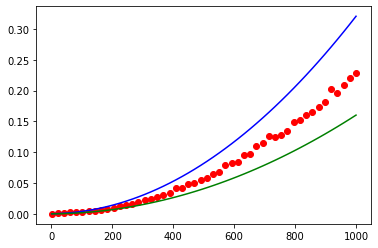

In [13]:
# plot your data and bounding functions here
plt.plot(ns, ts, 'or')

c = np.polyfit(ns, ts, 2, rcond=None, full=False, w=None, cov=False)
print(c)
p = np.poly1d(c)

plt.plot(ns, [1.4*p(n) for n in ns], '-b');
plt.plot(ns, [0.7*p(n) for n in ns], '-g');

---

## Exercise 4

In [14]:
def f4(n):
    counters = [0] * n
    while not all(counters):
        for i in range(n):
            if counters[i]:
                counters[i] = 0
            else:
                counters[i] = 1
                break

### Part 1

Hypothesis: $f_4 = O(2^N)$ &larr; fill in your hypothesis here

### Part 2

In [21]:
# collect timing data into arrays/lists here
ns = np.linspace(2, 20, 30, dtype=int)
ts = [timeit.timeit('f4({})'.format(n),
                    number=5,
                    globals=globals())
      for n in ns]

### Part 3

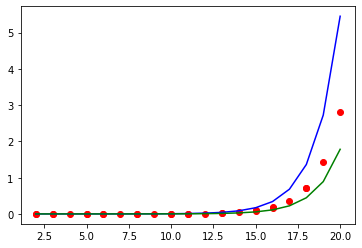

In [22]:
# plot your data and bounding functions here
plt.plot(ns, ts, 'or')

plt.plot(ns, [0.0000052*math.pow(2,n) for n in ns], '-b')
plt.plot(ns, [0.0000017*math.pow(2,n) for n in ns], '-g');

---

## Exercise 5

In [17]:
def f5(lst):
    n = len(lst)
    for i in range(n*100):
        a = random.randrange(n)
        b = random.randrange(n)
        lst[a], lst[b] = lst[b], lst[a]

### Part 1

Hypothesis: $f_5 = O(N)$ &larr; fill in your hypothesis here

### Part 2

In [18]:
# collect timing data into arrays/lists here
ns = np.linspace(0, 1000, 50, dtype=int)
ts = [timeit.timeit('f5(lst)',
                    setup=f'lst=list(range({n}))',
                    number=30, 
                    globals=globals()) 
      for n in ns]

### Part 3

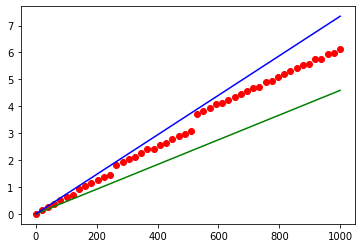

In [19]:
# plot your data and bounding functions here
plt.plot(ns, ts, 'or')
avg_slope = statistics.mean((ts[i+1] - ts[i]) / (ns[i+1] - ns[i]) for i in range(len(ns)-1))
plt.plot(ns, [0.75*avg_slope*n for n in ns], '-g')
plt.plot(ns, [1.2*avg_slope*n for n in ns], '-b');